# Calculate topology of a fracture network and plotting

Notebook example from Fracability (https://github.com/gecos-lab/FracAbility) as explained in Casiraghi et al. 2025. (https://egusphere.copernicus.org/preprints/2025/egusphere-2025-1398/).

We only changed the input to analyse the Tsanfleuron fracture interpretation. The files were added in the path \fracability\examples\datasets\tsan.
And we added a histogram for nodes degree.n.

In [1]:
from fracability.examples import data  # import the path of the sample data
from fracability import Entities  # import the Entities class

## Create fracture network entity

In [2]:
tsan_data = data.Tsan()
data_dict = tsan_data.data_dict  # Get dict of paths for the data

# Create the fractures and boundary objects. 
set_a = Entities.Fractures(shp=data_dict['EW_line.shp'], set_n=1, check_geometry=True)
set_b = Entities.Fractures(shp=data_dict['NESW_line_noo.shp'], set_n=2, check_geometry=True)
set_c = Entities.Fractures(shp=data_dict['NS_line.shp'], set_n=3, check_geometry=True)
set_d = Entities.Fractures(shp=data_dict['NWSE_line.shp'], set_n=4, check_geometry=True)

boundary = Entities.Boundary(shp=data_dict['boundary.shp'], group_n=1, check_geometry=True)

fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(set_a)
fracture_net.add_fractures(set_b)
fracture_net.add_fractures(set_c)
fracture_net.add_fractures(set_d)
fracture_net.add_boundaries(boundary)




Removing possible double points on geometries: 265/266


Multilines found, removing from database. If necessary correct them: [1]









Removing possible double points on geometries: 183/184


Checking geometries: 183/184


Removing possible double points on geometries: 172/173


Checking geometries: 172/173




## Calculate the topology of the network

the calculate_topology method calculates the topology of the network with also the node origin. By node origin we define which entities are related to the given node e.g.:

+ I node with node origin [x] -> related to a fracture of set x
+ Y node with node origin [x, y] -> related to a fracture of set x abutting on a fracture of set y
+ Y node with node origin [x, x] -> related to the intersection of fractures of the same set x
+ U node with node origin [x, b] -> related to a fracture of set x intersecting the boundary (b)
+ Y node with node origin [x, y, z] -> triple intersection, makes no sense -> problem in the geometry
+ X node with node origin [x, y] -> related to the intersection of fractures of set x and y
+ X node with node origin [w, x, y, z] -> quadruple intersection, makes no sense -> problem in the geometry

In [3]:
fracture_net.calculate_topology()




lines 55 (set 1), 32 (set 1) overlapping, checking if single or multiple point overlap
Single point overlap. Geometry is correct, continuing. Shp files could contain invalid geometries.
Calculating intersections on fracture: 625/625




Invalid point for lines: [12 11  9] 

sets: [1 3 4], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [ 13   8 183] 

sets: [1 3 3], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [13  9 10] 

sets: [1 3 3], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [ 14 262 170] 

sets: [1 1 4], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [ 20 182   7] 

sets: [1 3 4], 

The node will be

### Plot the network

C:\Users\burgoaa\Anaconda3\envs\geo_env\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\burgoaa\Anaconda3\envs\geo_env\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


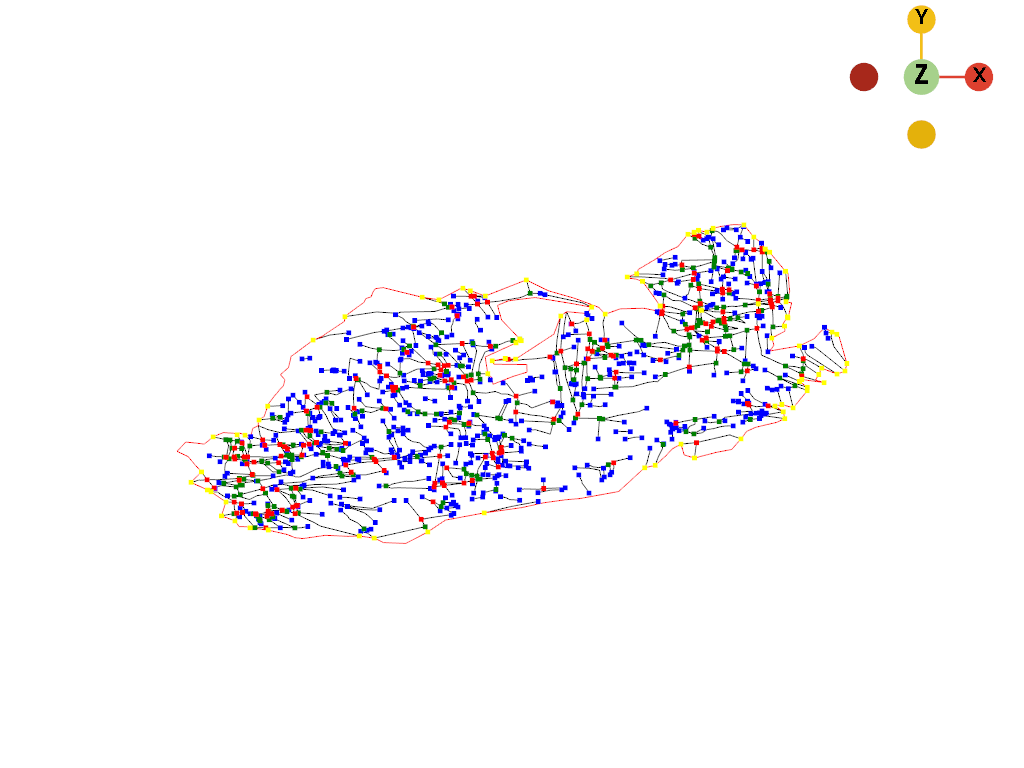

In [4]:
fracture_net.vtk_plot()

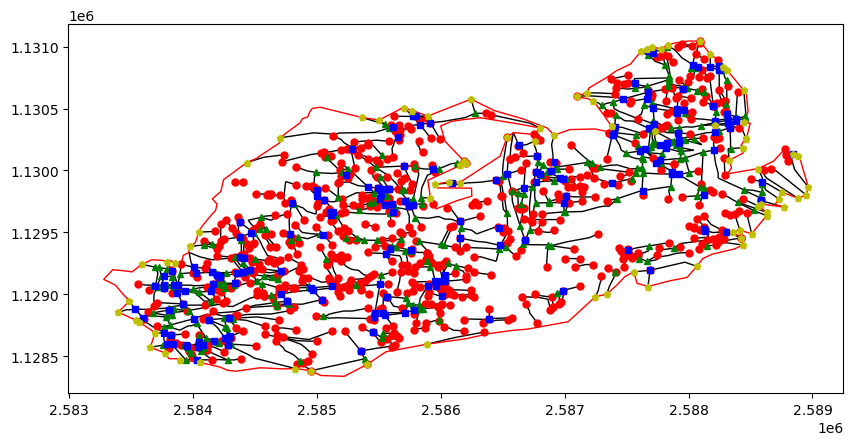

In [5]:
fracture_net.mat_plot()

In [21]:
fracture_net.save_shp('fracability_net.shp')

### Plot the ternary diagram and return the number of nodes

C:\Users\burgoaa\Anaconda3\envs\geo_env\Lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


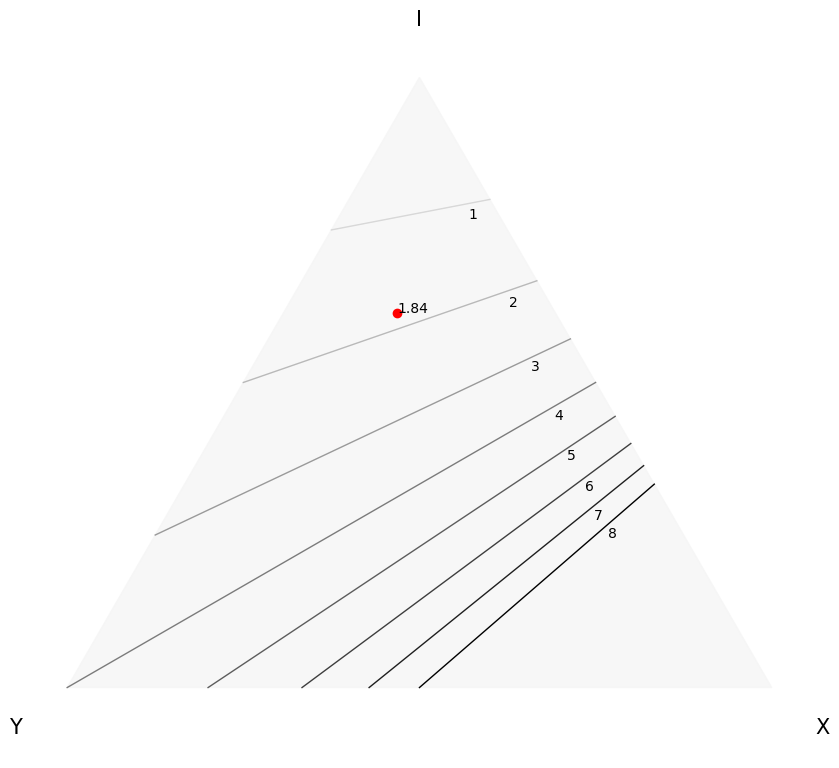

In [22]:
fracture_net.ternary_plot()

In [23]:
fracture_net.nodes.node_count # 1 = I, 3 = Y, 4 = X and 5 = U

{1: 714, 3: 262, 4: 188, 5: 81}

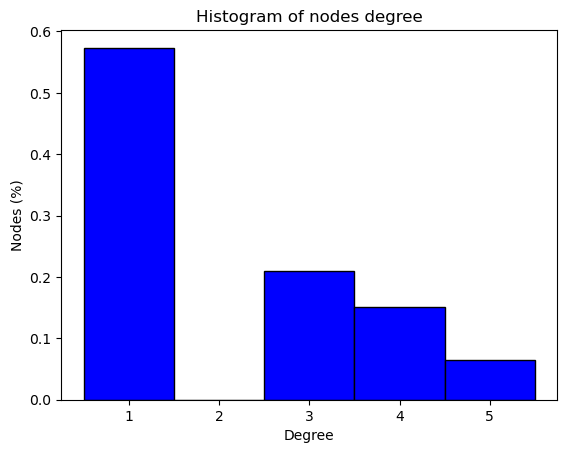

In [9]:
import matplotlib.pyplot as plt

data = fracture_net.nodes.node_count

# Expand dictionary into a list
expanded_data = []
for value, count in data.items():
    expanded_data.extend([value] * count)

# Plot histogram with density=True
plt.hist(expanded_data, bins=range(min(data), max(data)+2), density=True, color='blue', edgecolor='black', align='left')
plt.xlabel('Degree')
plt.ylabel('Nodes (%)')
plt.title('Histogram of nodes degree')
#plt.grid(axis='y', alpha=1)
plt.savefig('histodegree.jpg', dpi=300)
plt.show()

### Plot the backbone

C:\Users\burgoaa\Anaconda3\envs\geo_env\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\burgoaa\Anaconda3\envs\geo_env\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


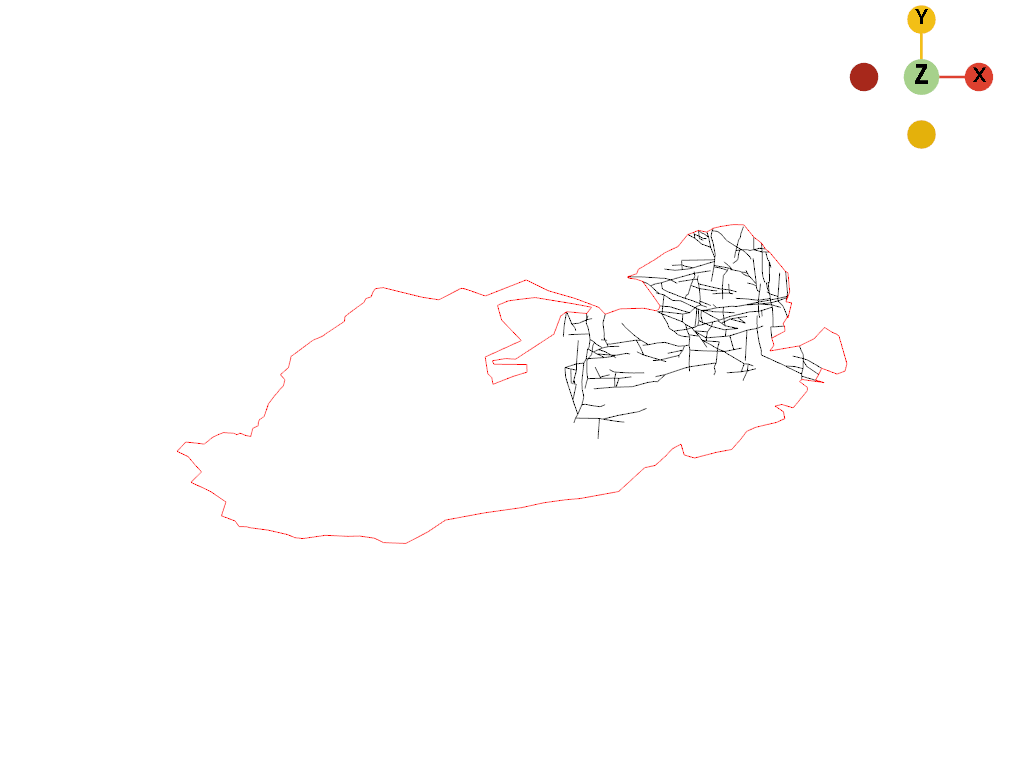

In [25]:
fracture_net.backbone_plot()